# 1. Aplicando seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Pegando um Dataset do banco de dados do Seaborn

In [3]:
sns.get_dataset_names()
planets = sns.load_dataset('planets')
planets.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Distplot e Displot fazem uma plotagem de gráficos de distribuição

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


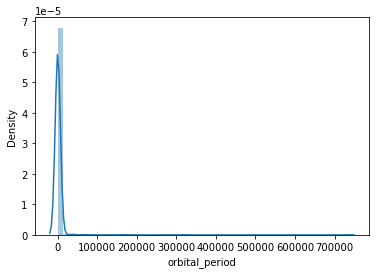

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


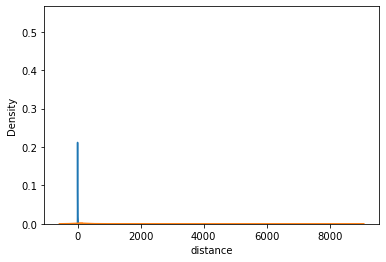

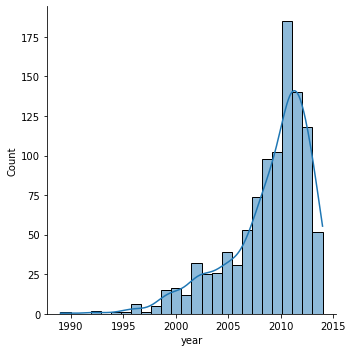

In [4]:
sns.distplot(planets['orbital_period'], kde=True)
plt.show();

sns.distplot(planets['mass'])

sns.distplot(planets['distance'])

sns.displot(planets['year'], kde=True);

### Jointplot faz uma plotagem de gráficos de distribuição entre duas variáveis

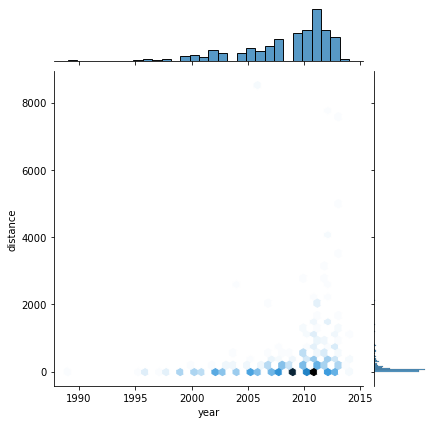

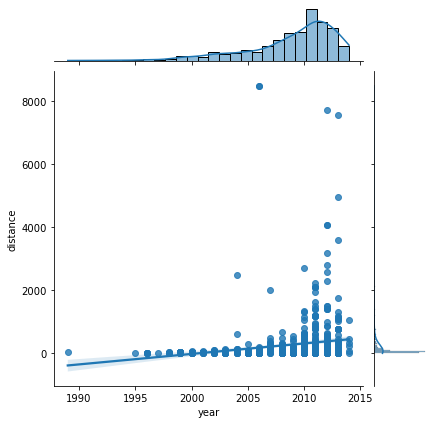

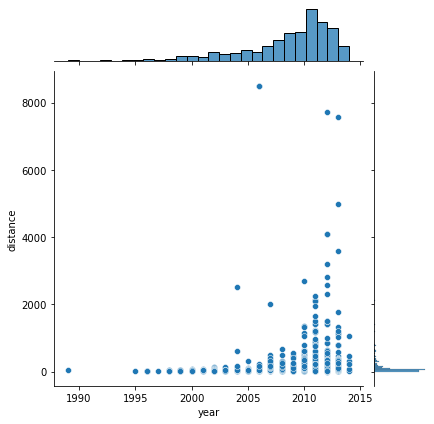

In [5]:
sns.jointplot(x=planets['year'], y=planets['distance'], data=planets, kind='hex');
sns.jointplot(x=planets['year'], y=planets['distance'], data=planets, kind='reg');
sns.jointplot(x=planets['year'], y=planets['distance'], data=planets, kind='scatter');

### Pairplot faz um Jointplot entre todas as variáveis numéricas possíveis do dataset

#### Parâmetro hue mostra nos gráficos plotados onde a coluna selecionada como parâmetro está localizada no dataset

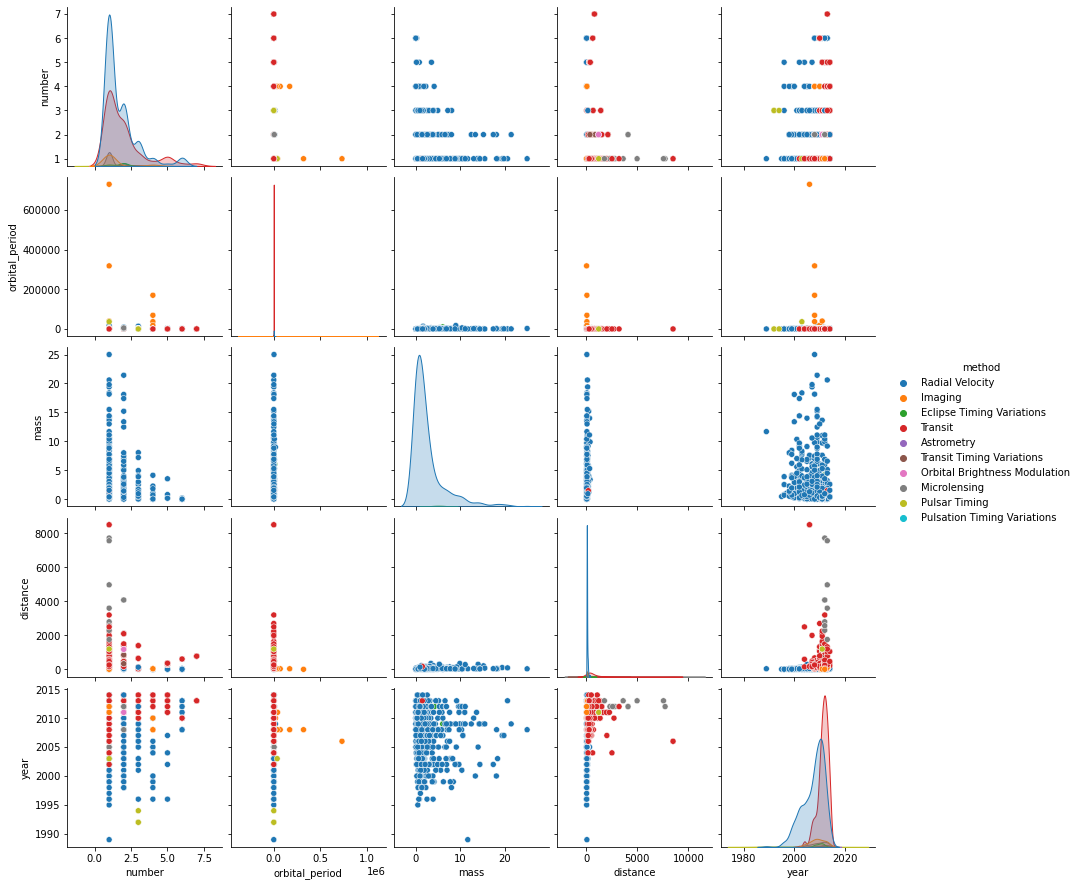

In [6]:
sns.pairplot(planets, hue='method')
plt.show()

### Kdeplot e Rugplot

**Rugplot faz um plot não muito utilizado que mostra onde os dados estão armazenados em sua maioria. Sua principal utilidade está quando utilizado com o kdeplot, que plota um kde (ele faz uma distribuição normal em todos os pontos, e soma eles, mostrando qual seria a distribuição mais provável de um dataset).**

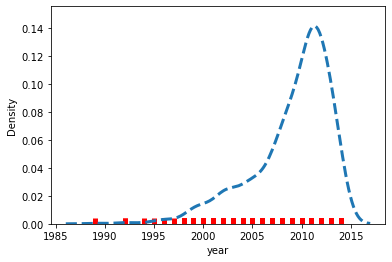

In [7]:
sns.kdeplot(planets['year'], lw=3, ls='--')
sns.rugplot(planets['year'], color='red', lw=5, ls='-');

**lw =** line width, **ls =** line style

## Gráficos categóricos (Geralmente contém muito texto e são discretos, ou seja: Não possuem muitas variáveis repetidas)

**Obs: Geralmente a variável X é a variável categórica e Y a numérica**

In [8]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Barplot plota um gráfico mostrando a média e o desvio padrão da variável Y (Barra preta)

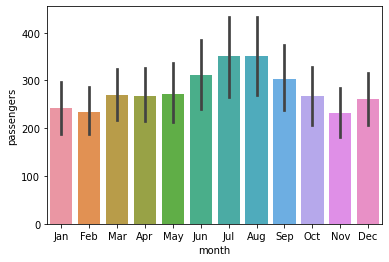

In [9]:
sns.barplot(x=flights['month'], y=flights['passengers'], data=flights);

**Também é possível passar outro operador passando no parametro estimator**

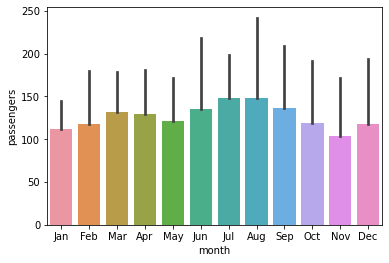

In [10]:
sns.barplot(x=flights['month'], y=flights['passengers'], data=flights, estimator=np.min);

### Countplot mostra um gráfico de contagem de aparições da variável na coluna

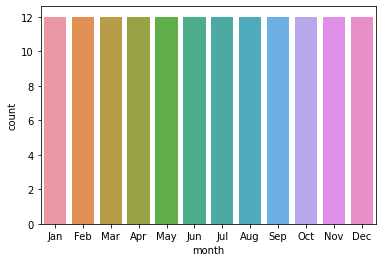

In [11]:
sns.countplot(x=flights['month'], data=flights);

### Boxplot plota um gráfico dos quantis e mostra onde os dados estão concentrados

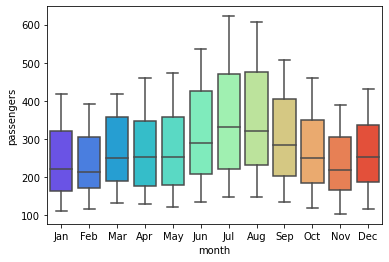

In [12]:
sns.boxplot(x=flights['month'], y=flights['passengers'], data=flights, palette='rainbow');

**Também é possível plotar o gráfico na horizontal, contanto que passe apenas o data**

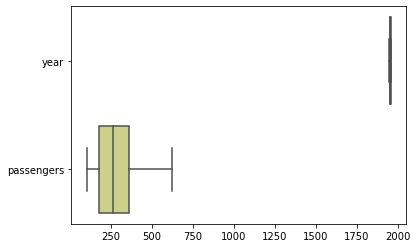

In [13]:
sns.boxplot(data=flights, palette='rainbow', orient='h');

### Violinplot plota um gráfico de kde de cada variável da coluna, e o ponto branco do boxplot dentro do violinplot se refere a média do dado

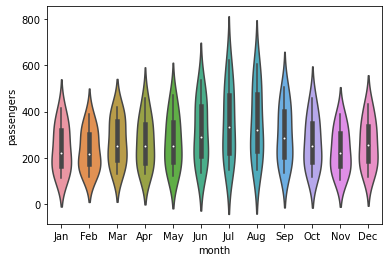

In [14]:
sns.violinplot(x=flights['month'], y=flights['passengers'], data=flights);

### Stripplot põe um ponto para cada item encontrado na variável

**Ponto negativo:** Se for um dataset grande, não é possível identificar itens distintos

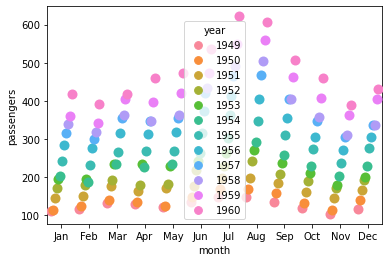

In [15]:
sns.stripplot(x=flights['month'], y=flights['passengers'], data=flights, hue='year', jitter=False, size=10, dodge=True);

**Obs:** ***jitter:*** Espalha os itens que estão grudados; ***size:*** Aumenta o tamanho da bolinha; ***split/dodge:*** Separa e agrupa os itens iguais de uma variável

### Swarmplot vai colocando uma bolinha lado a lado conforme ele vai encontrando um item no dataset 

**Ponto negativo:** Mesmo do stripplot

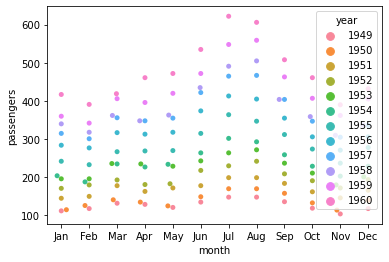

In [16]:
sns.swarmplot(x=flights['month'], y=flights['passengers'], data=flights, hue='year');

In [17]:
titanic = sns.load_dataset('titanic')
titanic.dropna(inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [18]:
titanic.pivot_table(index=['sex', 'alive', 'survived','adult_male','who', 'age'], columns=['class'], values='fare').iloc[:27]

class                                             First   Second    Third
sex    alive survived adult_male who   age                               
female no    0        False      child 2.0   151.550000      NaN  10.4625
                                 woman 25.0  151.550000      NaN      NaN
                                       29.0         NaN      NaN  10.4625
                                       50.0   28.712500      NaN      NaN
                                       57.0         NaN  10.5000      NaN
       yes   1        False      child 4.0          NaN  39.0000  16.7000
                                       14.0  120.000000      NaN      NaN
                                       15.0  211.337500      NaN      NaN
                                 woman 16.0   61.293067      NaN      NaN
                                       17.0   82.950000      NaN      NaN
                                       18.0  189.850000      NaN      NaN
                                       19.0   49.120833      NaN      NaN
                                       21.0  170.166650      NaN      NaN
                                       22.0   57.033333      NaN      NaN
                                       23.0  188.137500  13.7917      NaN
                                       24.0  106.852500  13.0000  16.7000
                                       27.0         NaN  10.5000  12.4750
                                       29.0  211.337500  10.5000      NaN
                                       30.0   78.976400      NaN      NaN
                                       31.0  139.070850      NaN      NaN
                                       32.0   76.291700      NaN      NaN
                                       32.5         NaN  13.0000      NaN
                                       33.0   76.533333      NaN      NaN
                                       34.0         NaN  10.5000      NaN
                                       35.0   90.552075      NaN      NaN
                                       36.0  108.877767  13.0000      NaN
                                       38.0  149.404150      NaN      NaN

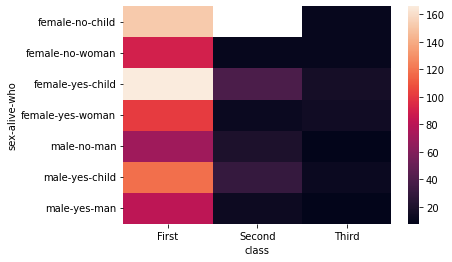

In [19]:
sns.heatmap(titanic.pivot_table(index=['sex', 'alive','who'], columns=['class'], values='fare'));

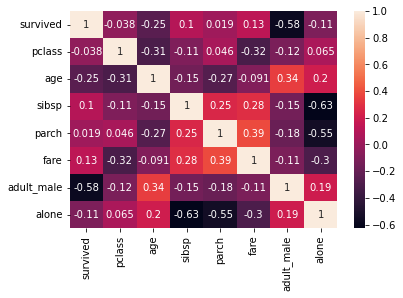

In [20]:
sns.heatmap(titanic.corr(), annot=True);